In [31]:
# pandas, geopandas, numpy for working with dataframes and arrays
import pandas as pd
import geopandas as gpd
import numpy as np

# matplotlib for basic plots
import matplotlib.pyplot as plt
%matplotlib inline

# plotly for interactive plots
import plotly.offline as py
from plotly.graph_objs import *
from plotly import tools
py.init_notebook_mode(connected=True)

In [7]:
# set pandas float display to have 2 decimal points and a comma separating every 1000X
pd.options.display.float_format = '{:,.2f}'.format

## Import government spending data

In [8]:
# original data from https://data.go.th/DatasetDetail.aspx?id=de82938b-361e-412c-bf30-4a4f2c5e6c3a
# note: the original data was re-encoded to utf8 to work with pandas
govSpendCntrct = pd.read_csv('GovSpending_25601002_contract_utf8.csv', 
                   usecols=['proj_no','proj_name','subdep_name','corp_name',
                            'mthd_name', 'typ_name','contrct_price','contrct_date'])

subdep_provnc = pd.read_csv('GovSpending_25601002_department_utf8.csv', usecols=['subdep_name','org_name','provnc'])

govSpendCntrct = govSpendCntrct.merge(subdep_provnc, 'left', on='subdep_name')
govSpendCntrct = govSpendCntrct[['proj_no', 'proj_name', 'subdep_name', 'org_name', 'provnc', 'mthd_name', 'typ_name', 'corp_name', 'contrct_price','contrct_date']]

In [15]:
govSpendCntrct['contrct_date'] = pd.to_datetime(govSpendCntrct['contrct_date'], dayfirst=True)

In [16]:
print('Data from:', govSpendCntrct['contrct_date'].min())
print('Data to:', govSpendCntrct['contrct_date'].max())
print('Total government spending (THB):', govSpendCntrct['contrct_price'].sum())
print('Total orders:', govSpendCntrct.shape[0])

Data from: 2017-08-16 00:00:00
Data to: 2017-10-31 00:00:00
Total government spending (THB): 220732037385.0
Total orders: 811241


In [58]:
govSpendCntrct.sample(5)

,proj_no,proj_name,subdep_name,org_name,provnc,mthd_name,typ_name,corp_name,contrct_price,contrct_date
180987,60107132605,ซื้อซื้อรองเท้าบู้ทและแว่นตาป้องกันอุบัติเหตุ ...,แขวงทางหลวงปัตตานี,ส่วนราชการทั่วไป,ปัตตานี,เฉพาะเจาะจง,ซื้อ,ร้านศรีสุพรรณพานิช,"5,000.00",2017-10-18
55846,60107133435,ซื้อซื้อวัตถุดิบประกอบอาหาร จำนวน 80 รายการ โด...,โรงพยาบาลจังหาร,ส่วนราชการประเภทสถานพยาบาล,ร้อยเอ็ด,เฉพาะเจาะจง,ซื้อ,นายฉัตรพงษ์ ศิริบูรณ์,"20,749.00",2017-10-20
801782,60107171688,จ้างจ้างเหมาประกอบอาหารกลางวันสำหรับศูนย์พัฒนา...,ศูนย์พัฒนาเด็กเล็กบ้านดงยาง,ส่วนราชการประเภทสถานศึกษา,อุดรธานี,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,นางบุญมา จำปาอ่อน,"25,498.00",2017-09-25
296939,60097161035,ซื้อป้ายไวนิลพร้อมโครงเหล็ก จำนวน ๑ ชุด โดยวิธ...,วิทยาลัยเกษตรและเทคโนโลยีอุดรธานี,ส่วนราชการประเภทสถานศึกษา,อุดรธานี,เฉพาะเจาะจง,ซื้อ,ร้านแม็กสติกเกอร์,"12,000.00",2017-09-11
649006,60097003018,จ้างเหมาซ่อมแซมรถสำนักงาน กข 3314,องค์การบริหารส่วนตำบลนาหว้า,องค์การบริหารส่วนตำบล,อำนาจเจริญ,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,บริษัทโตโยต้าอำนาจเจริญ จำกัด,"5,842.74",2017-08-31


In [17]:
get_col = ['proj_name','subdep_name','org_name','provnc','mthd_name','typ_name','corp_name','contrct_price']
govSpendCntrct.sort_values('contrct_price', ascending=False)[get_col].head(20)

,proj_name,subdep_name,org_name,provnc,mthd_name,typ_name,corp_name,contrct_price
767345,ประกวดราคาจ้างงานก่อสร้างอาคารศูนย์บริหารทางพิ...,การทางพิเศษแห่งประเทศไทย (กทพ.) กรุงเทพฯ,รัฐวิสาหกิจนอกตลาดหลักทรัพย์,กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,จ้างก่อสร้าง,บริษัท ฑีฆาก่อสร้าง จำกัด,"2,543,000,000.00"
171846,ประกวดราคาจ้างเหมาทำการก่อสร้างทางหลวงพิเศษระห...,สำนักก่อสร้างทางที่ 1 กรมทางหลวง กรุงเทพฯ,ส่วนราชการทั่วไป,กรุงเทพมหานคร,ประกวดราคาอิเล็กทรอนิกส์ (e-bidding),จ้างก่อสร้าง,บริษัท ชัยนันท์ค้าวัตถุก่อสร้าง (2524) จำกัด,"1,684,477,000.00"
767582,จ้างที่ปรึกษาโครงการ (PC) โครงการรถไฟฟ้าสายสีเ...,การรถไฟฟ้าขนส่งมวลชนแห่งประเทศไทย (รฟม.) กรุงเทพฯ,รัฐวิสาหกิจนอกตลาดหลักทรัพย์,กรุงเทพมหานคร,จ้างที่ปรึกษาโดยวิธีคัดเลือก,จ้างที่ปรึกษา,เอเชี่ยน เอ็นจิเนียริ่ง คอนซัลแต้นท์,"1,501,959,568.00"
171018,ประกวดราคาจ้างงานจ้างเหมาโครงการก่อสร้างทางหลว...,กรมทางหลวง กรุงเทพฯ,ส่วนราชการทั่วไป,กรุงเทพมหานคร,ประกวดราคาอิเล็กทรอนิกส์ (e-bidding),จ้างก่อสร้าง,บริษัท ประยูรวิศว์ จำกัด,"1,481,700,000.00"
768266,ประกวดราคาจ้างSupply and Construction of 500/2...,การไฟฟ้าฝ่ายผลิตแห่งประเทศไทย (กฟผ.) กรุงเทพฯ,รัฐวิสาหกิจนอกตลาดหลักทรัพย์,นนทบุรี,ประกวดราคา,จ้างก่อสร้าง,Consortium of Larsen & Toubro Limited and Sri ...,"1,471,533,706.00"
767518,ประกวดราคาจ้างโครงการก่อสร้างอาคารเรียน ศูนย์พ...,สถาบันการบินพลเรือน,รัฐวิสาหกิจนอกตลาดหลักทรัพย์,กรุงเทพมหานคร,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,จ้างก่อสร้าง,บริษัท บุญรัตน์พัฒนา จำกัด,"1,378,600,000.00"
171847,ประกวดราคาจ้างเหมาทำการก่อสร้างทางหลวงพิเศษระห...,สำนักก่อสร้างทางที่ 1 กรมทางหลวง กรุงเทพฯ,ส่วนราชการทั่วไป,กรุงเทพมหานคร,ประกวดราคาอิเล็กทรอนิกส์ (e-bidding),จ้างก่อสร้าง,บริษัท เอ็ม.ซี. คอนสตรัคชั่น (1979) จำกัด,"1,289,728,000.00"
767917,ประกวดราคาซื้อTransmission Line Conductor (Bi...,การไฟฟ้าฝ่ายผลิตแห่งประเทศไทย (กฟผ.) กรุงเทพฯ,รัฐวิสาหกิจนอกตลาดหลักทรัพย์,นนทบุรี,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,ซื้อ,บริษัท สายไฟฟ้าบางกอกเคเบิ้ล จำกัด,"1,249,610,251.00"
738400,ซื้อน้ำยาล้างไตทางช่องท้องระบบถุงคู่ (CAPD) โด...,สำนักงานหลักประกันสุขภาพแห่งชาติ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,พิเศษ,ซื้อ,องค์การเภสัชกรรม,"961,092,096.00"
767914,ประกวดราคาซื้อTransmission Line Conductor (Bid...,การไฟฟ้าฝ่ายผลิตแห่งประเทศไทย (กฟผ.) กรุงเทพฯ,รัฐวิสาหกิจนอกตลาดหลักทรัพย์,นนทบุรี,ประกวดราคาด้วยวิธีการทางอิเล็กทรอนิกส์,ซื้อ,บริษัท จรุงไทยไวร์แอนด์เคเบิ้ล จำกัด (มหาชน),"883,997,265.20"


## Plot relationship between corp_name and contract

In [18]:
list_to_group = ['corp_name']
target = ['contrct_price']

sum_contrct = govSpendCntrct[list_to_group+target].groupby(list_to_group).sum().sort_values(target,ascending=False)
count_contrct = govSpendCntrct[list_to_group+target].groupby(list_to_group).count().sort_values(target,ascending=False)

costPerContrct = (sum_contrct/count_contrct).sort_values(target,ascending=False)

In [19]:
start_date = govSpendCntrct['contrct_date'].min().strftime('%Y/%m/%d')
end_date = govSpendCntrct['contrct_date'].max().strftime('%Y/%m/%d')

count_total = count_contrct.sum()
sum_total = sum_contrct.sum()

count_contrct = count_contrct[:15]
sum_contrct = sum_contrct[:15]
costPerContrct = costPerContrct[:15]

marker = dict(color='rgb(158,202,225)',
              line=dict(color='rgb(8,48,107)',width=1.5),
             )

# if would like rainbow color
barcolors = ['hsl('+str(h)+',50%'+',50%)' for h in range(0, 360, int(360/count_contrct.shape[0]))]
edgescolors = ['hsl('+str(h)+',100%'+',20%)' for h in range(0, 360, int(360/count_contrct.shape[0]))]
marker = dict(color=barcolors,
              line=dict(color=edgescolors,width=1.5),
             )

trace_count = Bar(
                x=count_contrct.index,
                y=count_contrct['contrct_price'],
                text=['%.2f%% of total' % percent[0] for percent in (count_contrct/count_total*100).values],
                marker=marker,
                opacity=0.7,
                name='count'
                )
trace_sum = Bar(
                x=sum_contrct.index,
                y=sum_contrct['contrct_price'],
                text=['%.2f%% of total' % percent[0] for percent in (sum_contrct/sum_total*100).values],
                marker=marker,
                opacity=0.7,
                name='sum value'
                )
trace_avg = Bar(
                x=costPerContrct.index,
                y=costPerContrct['contrct_price'],
                marker=marker,
                opacity=0.7,
                name='per contract'
                )

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]], 
                          vertical_spacing=0.2,
                          subplot_titles=('15 บริษัทที่ได้จำนวนสัญญาจัดซื้อรวมสูงสุด',
                                          '15 บริษัทที่ได้รับมูลค่าสัญญารวมสูงสุด',
                                          '15 บริษัทที่มีมูลค่าจัดซื้อต่อสัญญาสูงสุด'))

fig.append_trace(trace_count, 1, 1)
fig.append_trace(trace_sum, 1, 2)
fig.append_trace(trace_avg, 2, 1)

fig['layout'].update(height=460, width=700, 
                     title='สรุปคำสั่งและงบประมาณการจัดซื้อของหน่วยงานรัฐบาล ({} ถึง {})'.format(start_date, end_date), 
                     showlegend=False, plot_bgcolor='rgb(256,256,256)',
                     font=dict(size=11)
                    )

fig['layout']['annotations'][0]['font'].update(size=13)
fig['layout']['annotations'][1]['font'].update(size=13)
fig['layout']['annotations'][2]['font'].update(size=14)

fig['layout']['yaxis1'].update(title='จำนวนรวม (สัญญา)')
fig['layout']['yaxis2'].update(title='มูลค่ารวม (บาท)')
fig['layout']['yaxis3'].update(title='มูลค่าต่อสัญญา (บาท/สัญญา)')

fig['layout']['xaxis1'].update(showticklabels=True,tickfont=dict(size=6),tickangle=20)
fig['layout']['xaxis2'].update(showticklabels=True,tickfont=dict(size=6),tickangle=20)
fig['layout']['xaxis3'].update(showticklabels=True,tickfont=dict(size=10),tickangle=20)

fig['layout']['annotations'][2]['y'] = 0.35

py.iplot(fig)
# py.plot(fig, filename='summaryByCompany.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



## Relationship between org_name and contract

In [20]:
list_to_group = ['org_name']
target = ['contrct_price']

sum_contrct = govSpendCntrct[list_to_group+target].groupby(list_to_group).sum().sort_values(target,ascending=False)
count_contrct = govSpendCntrct[list_to_group+target].groupby(list_to_group).count().sort_values(target,ascending=False)

costPerContrct = (sum_contrct/count_contrct).sort_values(target,ascending=False)

In [22]:
start_date = govSpendCntrct['contrct_date'].min().strftime('%Y/%m/%d')
end_date = govSpendCntrct['contrct_date'].max().strftime('%Y/%m/%d')

count_total = count_contrct.sum()
sum_total = sum_contrct.sum()

marker = dict(color='rgb(158,202,225)',
              line=dict(color='rgb(8,48,107)',width=1.5),
             )

# if would like rainbow color
barcolors = ['hsl('+str(h)+',50%'+',50%)' for h in range(0, 360, int(360/count_contrct.shape[0]))]
edgescolors = ['hsl('+str(h)+',100%'+',20%)' for h in range(0, 360, int(360/count_contrct.shape[0]))]
marker = dict(color=barcolors,
              line=dict(color=edgescolors,width=1.5),
             )

trace_count = Bar(
                x=count_contrct.index,
                y=count_contrct['contrct_price'],
                text=['%.2f%% of total' % percent[0] for percent in (count_contrct/count_total*100).values],
                marker=marker,
                opacity=0.7,
                name='count'
                )
trace_sum = Bar(
                x=sum_contrct.index,
                y=sum_contrct['contrct_price'],
                text=['%.2f%% of total' % percent[0] for percent in (sum_contrct/sum_total*100).values],
                marker=marker,
                opacity=0.7,
                name='sum value'
                )
trace_avg = Bar(
                x=costPerContrct.index,
                y=costPerContrct['contrct_price'],
                marker=marker,
                opacity=0.7,
                name='per contract'
                )

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]], 
                          vertical_spacing=0.25,
                          subplot_titles=('จำนวนสัญญาจัดซื้อรวมเรียงตามหน่วยงาน',
                                          'มูลค่าสัญญาจัดซื้อรวมเรียงตามหน่วยงาน',
                                          'มูลค่าสัญญาจัดซื้อต่อสัญญาเฉลี่ยเรียงตามหน่วยงาน')
                         )

fig.append_trace(trace_count, 1, 1)
fig.append_trace(trace_sum, 1, 2)
fig.append_trace(trace_avg, 2, 1)

fig['layout'].update(height=460, width=700, 
                     title='สรุปคำสั่งและงบประมาณการจัดซื้อของหน่วยงานรัฐบาล ({} ถึง {})'.format(start_date, end_date), 
                     showlegend=False, plot_bgcolor='rgb(256,256,256)',
                     font=dict(size=11)
                    )

fig['layout']['annotations'][0]['font'].update(size=13)
fig['layout']['annotations'][1]['font'].update(size=13)
fig['layout']['annotations'][2]['font'].update(size=14)

fig['layout']['yaxis1'].update(title='จำนวนรวม (สัญญา)')
fig['layout']['yaxis2'].update(title='มูลค่ารวม (บาท)')
fig['layout']['yaxis3'].update(title='มูลค่าต่อสัญญา (บาท/สัญญา)')

fig['layout']['xaxis1'].update(showticklabels=True,tickfont=dict(size=6),tickangle=20)
fig['layout']['xaxis2'].update(showticklabels=True,tickfont=dict(size=6),tickangle=20)
fig['layout']['xaxis3'].update(showticklabels=True,tickfont=dict(size=10),tickangle=20)

fig['layout']['annotations'][2]['y'] = 0.35

py.iplot(fig)
# py.plot(fig, filename='summaryByOrg.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



## Relationship between org_name and avg_contrct_price

In [65]:
x_data

Index(['หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ',
       'รัฐวิสาหกิจนอกตลาดหลักทรัพย์', 'องค์การมหาชน',
       'องค์การบริหารส่วนจังหวัด', 'ท้องถิ่นรูปแบบพิเศษ',
       'หน่วยงานของรัฐที่ไม่สังกัดสำนักนายกรัฐมนตรี กระทรวงหรือทบวง',
       'ส่วนราชการทั่วไป', 'เทศบาลนคร', 'องค์กรอิสระตามรัฐธรรมนูญ',
       'รัฐวิสาหกิจในตลาดหลักทรัพย์', 'เทศบาลเมือง', 'เทศบาลตำบล',
       'ส่วนราชการประเภทสถานศึกษา', 'องค์การบริหารส่วนตำบล',
       'ส่วนราชการประเภทสถานพยาบาล'],
      dtype='object', name='org_name')

In [68]:
govSpendCntrct[govSpendCntrct['org_name']=='หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ']

,proj_no,proj_name,subdep_name,org_name,provnc,mthd_name,typ_name,corp_name,contrct_price,contrct_date
106714,60097190008,จ้างปรับปรุงพื้นผิวทางเดินชั้น 1 พื้นที่ 152 ต...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,เกตพงษ์ศิริ,"478,803.60",2017-09-29
106715,60097197161,จ้างพัฒนาและสื่อสารชุดนิทรรศการในประเด็นการออก...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,นายอัฐพล ทองมี,"397,400.00",2017-09-29
106716,60097198452,จ้างดำเนินการจัดนิทรรศการสุขภาวะแนะนำองค์กร สส...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,บริษัท ธนวิชย จำกัด,"168,270.98",2017-09-29
106717,60097200101,จ้างบริการผลิตเอกสารและเครื่องถ่ายเอกสาร โดยวิ...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,บริษัท ฟูจิ ซีร็อกซ์ (ประเทศไทย) จำกัด,"500,000.00",2017-09-29
106718,60097207806,จ้างศูนย์ธุรการบริหารงานด้านเอกสารและสิ่งของ โ...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,ฟูจิ ซีร็อกซ์ (ประเทศไทย),"499,998.00",2017-09-29
106719,60097208364,จ้างจัดจ้างผู้ตรวจสอบแผนงาน โครงการ ชุดโครงการ...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,บริษัท เอส.พี.พี.แอคเคาน์แตนท์ เซอร์วิส จำกัด,"500,000.00",2017-09-29
106720,60097233637,จ้างจัดกิจกรรมเผยแพร่องค์ความรู้สุขภาวะ แก่บุค...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,บริษัท ดี มอร์ ครีเอทีฟแอนด์เมเนจเมนท์ จำกัด,"169,595.00",2017-09-29
106721,60097235252,จ้างบำรุงรักษาระบบคอมพิวเตอร์ โดยวิธีเฉพาะเจาะจง,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,สมาร์ท เทคโนโลยี โซลูชั่น,"111,280.00",2017-09-29
106722,60097238071,จ้างผลิตเครื่องมือสื่อสารโครงการประกวดนวัตกรรม...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,บริษัท สหมิตรพริ้นติ้งแอนด์พับลิสชิ่ง จำกัด,"125,725.00",2017-09-29
106723,60097238330,จ้างจัดทำประกันชีวิตและอุบัติเหตุ สำหรับบุคคลก...,สำนักงานกองทุนสนับสนุนการสร้างเสริมสุขภาพ,หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ,กรุงเทพมหานคร,เฉพาะเจาะจง,จ้างทำของ/จ้างเหมาบริการ,เอเซีย-แปซิฟิค อินชัวรันส์ โบรคเกอร์ส,"450,000.00",2017-09-29


In [72]:
govSpendCntrct.loc[govSpendCntrct['org_name']=='หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ','contrct_price']

106714     478,803.60
106715     397,400.00
106716     168,270.98
106717     500,000.00
106718     499,998.00
106719     500,000.00
106720     169,595.00
106721     111,280.00
106722     125,725.00
106723     450,000.00
106724     498,941.00
106725     500,000.00
106726     487,920.00
106727     500,000.00
106728     500,000.00
106729     321,000.00
106730     454,750.00
106731     179,225.00
106732     499,450.00
106733     394,295.00
106979     401,250.00
106980     481,500.00
106981     498,426.33
106982     385,200.00
106983     114,918.00
106984     389,880.00
106985     389,480.00
106986     346,680.00
106987     296,475.60
106988     683,088.00
             ...     
741468     191,388.00
741469     157,932.00
741470     129,150.00
741471     196,800.00
741472      11,770.00
741473       6,955.00
741474     184,500.00
741475     210,576.00
741476     184,500.00
741477     132,840.00
741478     274,032.00
741479     120,960.00
755229   1,168,440.00
755230     295,000.00
755231    

In [74]:
n_sampling = 100
x_data = costPerContrct.index

# if would like rainbow color
barcolors = ['hsl('+str(h)+',50%'+',50%)' for h in range(0, 360, int(360/count_contrct.shape[0]))]
edgescolors = ['hsl('+str(h)+',100%'+',20%)' for h in range(0, 360, int(360/count_contrct.shape[0]))]
marker = dict(color=barcolors,
              line=dict(color=edgescolors,width=1.5),
             )
traces = []
hover_text = []

for xd, cls in zip(x_data, barcolors):
    temp_df = govSpendCntrct.loc[govSpendCntrct['org_name']=='หน่วยงานอื่นของรัฐที่จัดตั้งโดยกฎหมายเฉพาะ','contrct_price']
    q1_mark = temp_df.quantile(0.25)
    q3_mark = temp_df.quantile(0.75)
    
    hover_text.append('{}:<br>Mean={:.0f}k<br>Q3={:.0f}k<br>median={:.0f}k<br>Q1={:.0f}k'.format(
        xd,temp_df.mean()/1000,q3_mark/1000,temp_df.median()/1000,q1_mark/1000))
    
    hover_text_temp = '{}:<br>Mean={:.0f}k<br>Q3={:.0f}k<br>median={:.0f}k<br>Q1={:.0f}k'.format(
        xd,temp_df.mean()/1000,q3_mark/1000,temp_df.median()/1000,q1_mark/1000)
    
    traces.append(Box(
                    y=temp_df.sample(n_sampling),
                    name=xd,
                    boxpoints='all',
                    pointpos=0,
                    jitter=1,
                    whiskerwidth=0.2,
                    marker=dict(color=cls, size=4),
                    opacity=0.5, 
                    fillcolor='rgba(0,0,0,0)',
                    line=dict(color='rgba(0,0,0,0)'),
                    text=hover_text_temp,
                    hoverinfo='text'
                    )
                 )

    temp_df.loc[temp_df<=q1_mark] = q1_mark
    temp_df.loc[temp_df>=q3_mark] = q3_mark
    
    # use this to make the box plot instead of using the whole temp_df (with 8xx,xxx data points)
    # since a box plot keeps all data points even when the points are hidden --> large file size
    temp_box = pd.Series([q1_mark]*5+[temp_df.mean()]+[q3_mark]*5)
    
    traces.append(Box(
#                     y=temp_df,
                    y=temp_box,
                    name=xd,
                    boxpoints=False,
                    whiskerwidth=0.2,
                    opacity=0.7, 
                    line=dict(color=cls),
                    hoverinfo='none'
                    )
                 )

    
traces.append(Bar(
                x=costPerContrct.index,
                y=costPerContrct['contrct_price'],
                marker=marker,
                opacity=0.2,
                name='average',
                text=hover_text,
                hoverinfo='none'
                )
             )    
        
layout = Layout(
    title='มูลค่าสัญญาจัดซื้อเฉลี่ยและการกระจายตัว (บาท/สัญญา)',
    showlegend=False,
    width=600,
    height=400,
    font=dict(size=11),
    yaxis=dict(
        range=[0, 11e6]
    )
)

fig = Figure(data=traces, layout=layout)
py.iplot(fig)
# py.plot(fig, filename='spendingDistributionByOrg.html')

## Thailand map

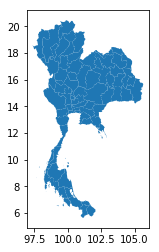

In [29]:
# original data from https://github.com/apisit/thailand.json
gdf = gpd.read_file('thailand.json')
gdf.columns = ['Province','geometry']

gdf.plot()
plt.show()

## Thailand Referendum 2016

In [32]:
# original data from https://data.go.th/DatasetDetail.aspx?id=8d13d593-aea4-40b9-ad78-884da8a49e35
# note: the original data was re-encoded to utf8 to work with pandas
df = pd.read_csv('ThailandReferendum2016_regular.csv', skiprows=3, header=[0,1])
province_pair = pd.read_csv('thaiProvinces.csv', header=None, names=['จังหวัด','Province'])

arrays = [['จังหวัด', 'ภาค', 'ผู้มีสิทธิออกเสียง', 'ผู้มาใช้สิทธิออกเสียง', 'มาใช้สิทธิ์ร้อยละ', 
           'ประเด็นที่ 1 ร่างรัฐธรรมนูญ', 'ประเด็นที่ 1 ร่างรัฐธรรมนูญ', 'ประเด็นที่ 1 ร่างรัฐธรรมนูญ', 'ประเด็นที่ 1 ร่างรัฐธรรมนูญ', 
           'ประเด็นที่ 2 คำถามเพิ่มเติม', 'ประเด็นที่ 2 คำถามเพิ่มเติม', 'ประเด็นที่ 2 คำถามเพิ่มเติม', 'ประเด็นที่ 2 คำถามเพิ่มเติม', 
           'บัตรเสีย', 'บัตรเสียร้อยละ'],
          ['', '', '', '', '', 
           'เห็นชอบ', 'เห็นชอบร้อยละ', 'ไม่เห็นชอบ', 'ไม่เห็นชอบร้อยละ', 
           'เห็นชอบ', 'เห็นชอบร้อยละ', 'ไม่เห็นชอบ', 'ไม่เห็นชอบร้อยละ',
           '', '']]

tuples = list(zip(*arrays))
columns = pd.MultiIndex.from_tuples(tuples)

df.columns = columns
df.columns = [' '.join(col).strip() for col in df.columns.values]
columns = np.insert(df.columns.values, 1, 'Province')

df = pd.merge(df, province_pair, 'inner', 'จังหวัด')
df = df[columns]

## Merge geo and referendum data

In [34]:
gdf = pd.merge(gdf, df, 'inner', on='Province')

In [35]:
gdf.head()

,Province,geometry,จังหวัด,ภาค,ผู้มีสิทธิออกเสียง,ผู้มาใช้สิทธิออกเสียง,มาใช้สิทธิ์ร้อยละ,ประเด็นที่ 1 ร่างรัฐธรรมนูญ เห็นชอบ,ประเด็นที่ 1 ร่างรัฐธรรมนูญ เห็นชอบร้อยละ,ประเด็นที่ 1 ร่างรัฐธรรมนูญ ไม่เห็นชอบ,ประเด็นที่ 1 ร่างรัฐธรรมนูญ ไม่เห็นชอบร้อยละ,ประเด็นที่ 2 คำถามเพิ่มเติม เห็นชอบ,ประเด็นที่ 2 คำถามเพิ่มเติม เห็นชอบร้อยละ,ประเด็นที่ 2 คำถามเพิ่มเติม ไม่เห็นชอบ,ประเด็นที่ 2 คำถามเพิ่มเติม ไม่เห็นชอบร้อยละ,บัตรเสีย,บัตรเสียร้อยละ
0,Mae Hong Son,"POLYGON ((98.0859298100001 19.77316111200008, ...",แม่ฮ่องสอน,เหนือ,163096,121282,74.36,69439,64.18,38757,35.82,59696,59.32,40939,40.68,5105,4.21
1,Chumphon,"POLYGON ((99.27257653168158 10.95801361753442,...",ชุมพร,ใต้,388203,244052,62.87,208068,90.04,23004,9.96,196293,87.51,28023,12.49,5347,2.19
2,Nakhon Si Thammarat,"POLYGON ((100.3424593341746 7.938784496738819,...",นครศรีธรรมราช,ใต้,1181793,677488,57.33,559689,88.05,75927,11.95,526123,85.93,86158,14.07,17192,2.54
3,Phuket,"POLYGON ((98.4186304050001 7.903753973000079, ...",ภูเก็ต,ใต้,274407,150326,54.78,125643,88.03,17081,11.97,118969,85.59,20022,14.41,3181,2.12
4,Phangnga,(POLYGON ((98.53630618600008 8.115139065000108...,พังงา,ใต้,197709,123981,62.71,97952,84.23,18344,15.77,91886,81.43,20952,18.57,3280,2.65


## Relationship between province and contract

In [37]:
temp = govSpendCntrct[['provnc','contrct_price']].groupby('provnc').sum()
gdf = pd.merge(gdf, temp, 'inner', left_on='จังหวัด', right_index=True)
map_df = pd.merge(gdf[['Province','geometry','จังหวัด','ผู้มีสิทธิออกเสียง']], temp, 'inner', left_on='จังหวัด', right_index=True)

In [44]:
map_df.head(5)

,Province,geometry,จังหวัด,ผู้มีสิทธิออกเสียง,contrct_price
0,Mae Hong Son,"POLYGON ((98.0859298100001 19.77316111200008, ...",แม่ฮ่องสอน,163096,"689,959,994.31"
1,Chumphon,"POLYGON ((99.27257653168158 10.95801361753442,...",ชุมพร,388203,"1,195,840,440.56"
2,Nakhon Si Thammarat,"POLYGON ((100.3424593341746 7.938784496738819,...",นครศรีธรรมราช,1181793,"3,379,313,800.91"
3,Phuket,"POLYGON ((98.4186304050001 7.903753973000079, ...",ภูเก็ต,274407,"1,765,732,253.70"
4,Phangnga,(POLYGON ((98.53630618600008 8.115139065000108...,พังงา,197709,"845,571,125.58"


## Plot relationships between government spending and provinces

In [42]:
# import a custom made functions to plot plotly maps
from plotly_map_gen import *

In [56]:
# for Medium

plot_data1 = []
plot_data2 = []

# column of interest 
dataCol = 'contrct_price'

# polygon simplification factor
simplify_factor=0.03

# set location of the colorbar
cbar1_x = 0.33
cbar1_y = 0.25
cbar2_x = 0.74
cbar2_y = 0.25

#plot type -- 'linear' or 'log'
cbar1_type = 'linear'
cbar2_type = 'log'

# set tick locations and texts on the colorbar
cbar1_ticktext = ['1B','5B','10B','50B'] if cbar1_type=='log' else None
cbar1_tickvals = np.log10(np.array([1,2,10,50])*1e9) if cbar1_type=='log' else None
cbar2_ticktext = ['1B','5B','10B','50B'] if cbar2_type=='log' else None
cbar2_tickvals = np.log10(np.array([1,2,10,50])*1e9) if cbar2_type=='log' else None


gen_map(plot_data1, map_df, dataCol, simplify_factor, cbar1_x, cbar1_y, cbar1_type, 
        cbar_tickvals=cbar1_tickvals, cbar_ticktext=cbar1_ticktext, colorbarname='Thai Baht')

gen_map(plot_data2, map_df, dataCol, simplify_factor, cbar2_x, cbar2_y, cbar2_type, 
        cbar_tickvals=cbar2_tickvals, cbar_ticktext=cbar2_ticktext, colorbarname='Thai Baht')

##################

fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Linear-scale', 'Log-scale'))

for e1, e2 in zip(plot_data1,plot_data2):
    fig.append_trace(e1, 1, 1)
    fig.append_trace(e2, 1, 2)

fig['layout'].update(hovermode = 'closest', height=466, width=700, 
                     title='Sum government spending by province <br>' + 
                     '({} to {})'.format(start_date, end_date),
                     xaxis1 = {'anchor': 'y1', 'domain': [0.15, 0.44]},
                     xaxis2 = {'anchor': 'y2', 'domain': [0.56, 0.85]}
                    )

fig['layout']['annotations'][0]['x'] = 0.29
fig['layout']['annotations'][1]['x'] = 0.72

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Plot relationships between government spending per eligible voter and provinces

In [45]:
map_df['contrct_price_per_eligible_voter'] = map_df['contrct_price']/map_df['ผู้มีสิทธิออกเสียง']

In [46]:
map_df.head(5)

,Province,geometry,จังหวัด,ผู้มีสิทธิออกเสียง,contrct_price,contrct_price_per_eligible_voter
0,Mae Hong Son,"POLYGON ((98.0859298100001 19.77316111200008, ...",แม่ฮ่องสอน,163096,"689,959,994.31","4,230.39"
1,Chumphon,"POLYGON ((99.27257653168158 10.95801361753442,...",ชุมพร,388203,"1,195,840,440.56","3,080.45"
2,Nakhon Si Thammarat,"POLYGON ((100.3424593341746 7.938784496738819,...",นครศรีธรรมราช,1181793,"3,379,313,800.91","2,859.48"
3,Phuket,"POLYGON ((98.4186304050001 7.903753973000079, ...",ภูเก็ต,274407,"1,765,732,253.70","6,434.72"
4,Phangnga,(POLYGON ((98.53630618600008 8.115139065000108...,พังงา,197709,"845,571,125.58","4,276.85"


In [57]:
# for Medium

plot_data3 = []
plot_data4 = []

# column of interest 
dataCol = 'contrct_price_per_eligible_voter'

# polygon simplification factor
simplify_factor=0.03

# set location of the colorbar
cbar3_x = 0.33
cbar3_y = 0.25
cbar4_x = 0.74
cbar4_y = 0.25

#plot type -- 'linear' or 'log'
cbar3_type = 'linear'
cbar4_type = 'log'

# set tick locations and texts on the colorbar
cbar3_ticktext = ['2k','5k','10k'] if cbar1_type=='log' else None
cbar3_tickvals = np.log10(np.array([2,5,10])*1e3) if cbar3_type=='log' else None
cbar4_ticktext = ['2k','5k','10k'] if cbar2_type=='log' else None
cbar4_tickvals = np.log10(np.array([2,5,10])*1e3) if cbar4_type=='log' else None


gen_map(plot_data3, map_df, dataCol, simplify_factor, cbar3_x, cbar3_y, cbar3_type, 
        cbar_tickvals=cbar3_tickvals, cbar_ticktext=cbar3_ticktext, colorbarname='Thai Baht')

gen_map(plot_data4, map_df, dataCol, simplify_factor, cbar4_x, cbar4_y, cbar4_type, 
        cbar_tickvals=cbar4_tickvals, cbar_ticktext=cbar4_ticktext, colorbarname='Thai Baht')

##################

fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Linear-scale', 'Log-scale'))

for e1, e2 in zip(plot_data3,plot_data4):
    fig.append_trace(e1, 1, 1)
    fig.append_trace(e2, 1, 2)

fig['layout'].update(hovermode = 'closest', height=466, width=700, 
                     title='Sum government spending per eligible voter by province <br>' + 
                     '({} to {})'.format(start_date, end_date),
                     xaxis1 = {'anchor': 'y1', 'domain': [0.15, 0.44]},
                     xaxis2 = {'anchor': 'y2', 'domain': [0.56, 0.85]}
                    )

fig['layout']['annotations'][0]['x'] = 0.29
fig['layout']['annotations'][1]['x'] = 0.72

py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



## Creating an opening plot -- combining different types of plots

In [60]:
# re-create this placeholder plot with correct locations of text, labels, colorbar, etc.

plot_data2 = []

# column of interest 
dataCol = 'contrct_price'

# polygon simplification factor
simplify_factor=0.03

# set location of the colorbar
cbar2_x = 0.9
cbar2_y = 0.25

#plot type -- 'linear' or 'log'
cbar1_type = 'linear'
cbar2_type = 'log'

# set tick locations and texts on the colorbar
cbar2_ticktext = ['1B','5B','10B','50B'] if cbar2_type=='log' else None
cbar2_tickvals = np.log10(np.array([1,2,10,50])*1e9) if cbar2_type=='log' else None

gen_map(plot_data2, map_df, dataCol, simplify_factor, cbar2_x, cbar2_y, cbar2_type, 
        cbar_tickvals=cbar2_tickvals, cbar_ticktext=cbar2_ticktext, colorbarname='Thai Baht')

In [61]:
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('การกระจายตัว (บาท/สัญญา)', 
                                          'มูลค่ารวมตามจังหวัด'))

# traces were created when plotting the distribution of spending
for e1 in traces:
    fig.append_trace(e1, 1, 1)

# spending by province    
for e1 in plot_data2:
    fig.append_trace(e1, 1, 2)
    
fig['layout'].update(hovermode = 'closest', 
                     height=460, width=700, showlegend=False,
                     title='ข้อมูลคำสั่งจัดซื้อจัดจ้างโดยหน่วยงานรัฐบาล <br>' + 
                     '({} to {})'.format(start_date, end_date),
                     xaxis1 = {'anchor': 'y1', 'domain': [0.0, 0.7]},
                     yaxis1 = {'range': [0, 11e6]},
                     xaxis2 = {'anchor': 'y2', 'domain': [0.73, 1]}
                    )

fig['layout']['annotations'][0]['x'] = 0.35
fig['layout']['annotations'][1]['x'] = 0.86
fig['layout']['annotations'][0]['font'].update({'size': 13})
fig['layout']['annotations'][1]['font'].update({'size': 13})
fig['layout']['xaxis1'].update(showticklabels=True,tickfont=dict(size=9),tickangle=25)

py.iplot(fig)
# py.plot(fig, filename='openningPlot.html')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

